In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from source import data_import
from source.calculate_mean_psd import calculate_mean_psd
from source.constants import CHANNELS, FREQUENCY_RANGES

print(f"loaded channel names: {CHANNELS}")

loaded channel names: ['F4-C4', 'F3-C3', 'FT9-FT10', 'FZ-CZ', 'F7-T7', 'FP2-F4', 'T8-P8-1', 'T8-P8-0', 'FP1-F3', 'CZ-PZ']


In [196]:
# load data
df_pp = data_import.load_pyarrow(file_name="preprocessed_seg")
df_pp.shape

/Users/anabroggini/Documents/bootcamp/ai2/source/../data/preprocessed_seg.arrow was loaded.


(2995200, 16)

In [148]:
df_pp.head()

channel,F4-C4,F3-C3,FT9-FT10,FZ-CZ,F7-T7,FP2-F4,T8-P8-1,T8-P8-0,FP1-F3,CZ-PZ,is_seizure,before_seizure,epoch,segment_id,seizure_start,seizure_id
0 days 00:30:00,16.878726,20.334213,-3.322584,17.941953,18.739373,33.092935,12.625819,12.625819,44.788430,2.790970,False,False,0,0,False,0
0 days 00:30:00.003906250,22.891349,24.865283,-8.175141,23.784967,26.448730,40.639022,11.874291,11.874291,59.506243,4.538652,False,False,0,0,False,0
0 days 00:30:00.007812500,22.162881,25.360125,-8.902114,25.615925,27.023819,40.074853,5.285063,5.285063,60.136641,5.292160,False,False,0,0,False,0
0 days 00:30:00.011718750,29.573426,33.953147,-14.930178,33.038895,32.700204,52.956037,8.308854,8.308854,79.842157,8.558853,False,False,0,0,False,0
0 days 00:30:00.015625,21.292400,18.163275,-11.955401,21.366748,20.938086,35.328903,-1.132117,-1.132117,60.607725,6.096930,False,False,0,0,False,0


In [271]:
df_pp.shape

(2995200, 16)

## Feature Extraction

In [197]:
# ignore for aggregation
ignore_col = ['is_seizure']
ignore_col = []

In [198]:
### aggregate Functions for mean psd:
delta = lambda x: calculate_mean_psd(x, frequency_ranges={'Delta' : FREQUENCY_RANGES['Delta']})[x.name]['Delta']
theta = lambda x: calculate_mean_psd(x, frequency_ranges={'Theta' : FREQUENCY_RANGES['Theta']})[x.name]['Theta']
gamma = lambda x: calculate_mean_psd(x, frequency_ranges={'Gamma': FREQUENCY_RANGES['Gamma']})[x.name]['Gamma']

delta_agg = pd.NamedAgg(column='delta', aggfunc=delta)
theta_agg = pd.NamedAgg(column='theta', aggfunc=theta)
gamma_agg = pd.NamedAgg(column='gamma', aggfunc=gamma)

In [310]:
df_features = df_pp.groupby(['epoch', 'is_seizure','segment_id']).agg(
    {C:[
        'mean', 
        'std',
        'var',
        delta_agg,
        theta_agg,
        gamma_agg
        ] for C in CHANNELS} | 
    {ic: ['first'] for ic in ignore_col}) # just taking first element for target column
df_features.head(20)

channel                         F4-C4                                     \
                                 mean        std         var       delta   
epoch is_seizure segment_id                                                
0     False      0           1.677760  19.215291  369.227396   39.509423   
                 1          -0.391839  19.292719  372.208995   57.166882   
                 2           1.356797  26.026211  677.363658  112.603482   
                 3          -1.657887  26.999490  728.972443  148.551723   
                 4           0.776272  23.273241  541.643731   77.372989   
                 5          -0.036669  22.655431  513.268557   76.212479   
                 6           0.828300  23.433931  549.149139   76.743032   
                 7           0.423259  18.370345  337.469568   48.173382   
                 8          -0.204437  21.013780  441.578959   65.756756   
                 9          -0.541733  20.651241  426.473748   63.858712   
                 10         -1.433602  22.760438  518.037527   64.155017   
                 11          0.858445  21.094828  444.991781   59.395977   
                 12          0.911867  24.738850  612.010719   68.379748   
                 13          0.465814  22.670439  513.948822   54.103009   
                 14         -1.989113  21.793507  474.956940   56.506454   
                 15          3.525269  28.587719  817.257699   81.836212   
                 16         -0.034730  23.875669  570.047557   70.534141   
                 17          0.329388  23.674058  560.461013   77.900706   
                 18          0.177574  22.377729  500.762755   69.568677   
                 19         -1.178520  21.650951  468.763693   70.035707   

channel                                              F3-C3             \
                                 theta     gamma      mean        std   
epoch is_seizure segment_id                                             
0     False      0           15.649456  1.143016  1.053339  21.315638   
                 1           13.481116  1.218430  0.811962  25.477037   
                 2           22.111449  0.943441  1.282874  27.729263   
                 3           15.161321  1.178056 -2.174102  29.614908   
                 4           25.561364  1.423834  0.848064  23.413506   
                 5           24.818786  1.681127  1.519052  27.859298   
                 6           11.805732  0.505023  0.444250  25.189341   
                 7           16.238093  0.567528 -1.224905  20.170082   
                 8           19.679089  0.560435  0.673145  20.608746   
                 9           22.948710  0.843431  1.027493  25.653559   
                 10          32.004346  0.496181 -3.891219  23.132472   
                 11          16.287154  1.026989  4.006365  21.408741   
                 12          18.525360  1.660569 -2.782490  29.578451   
                 13          33.296850  1.561265  0.932512  25.293816   
                 14          12.306173  1.192592  2.684003  17.346634   
                 15          27.228202  4.459200 -1.525112  33.256693   
                 16          27.315039  1.255196  1.426379  27.987524   
                 17          19.568422  2.300716 -0.933698  26.844604   
                 18          27.839211  1.799566  0.011056  28.269544   
                 19          22.505068  0.759218  0.893545  19.960243   

channel                                               ...        FP1-F3  \
                                     var       delta  ...           var   
epoch is_seizure segment_id                           ...                 
0     False      0            454.356435   50.669637  ...   7762.000517   
                 1            649.079429   43.699214  ...   2957.253827   
                 2            768.912015  114.429972  ...  13067.588944   
                 3            877.042781  160.101362  ...   9032.557430   
                 4            548.192254   58.

## Flatten Dataframe

In [311]:
# joining column names with agg functions, but leaving target 'is_seizure' column as 'is_seizure'.
df_features.columns = ['_'.join(col).strip() for col in df_features.columns.values if 'is_seizure' != col[0]] #+ ['is_seizure']
df_features.reset_index(inplace=True)
df_features.head(10)


,epoch,is_seizure,segment_id,F4-C4_mean,F4-C4_std,F4-C4_var,F4-C4_delta,F4-C4_theta,F4-C4_gamma,F3-C3_mean,...,FP1-F3_var,FP1-F3_delta,FP1-F3_theta,FP1-F3_gamma,CZ-PZ_mean,CZ-PZ_std,CZ-PZ_var,CZ-PZ_delta,CZ-PZ_theta,CZ-PZ_gamma
0,0,False,0,1.677760,19.215291,369.227396,39.509423,15.649456,1.143016,1.053339,...,7762.000517,678.257264,92.822474,22.441816,0.692305,16.368013,267.911860,33.181709,18.606278,0.272641
1,0,False,1,-0.391839,19.292719,372.208995,57.166882,13.481116,1.218430,0.811962,...,2957.253827,228.536554,76.808250,33.427544,-0.487618,18.012047,324.433840,40.078259,21.722061,0.268936
2,0,False,2,1.356797,26.026211,677.363658,112.603482,22.111449,0.943441,1.282874,...,13067.588944,2277.403585,176.024973,8.914849,1.294472,22.813508,520.456131,78.066994,19.695134,0.256728
3,0,False,3,-1.657887,26.999490,728.972443,148.551723,15.161321,1.178056,-2.174102,...,9032.557430,1990.870208,75.730101,21.215121,-0.476040,19.942794,397.715029,60.340596,18.821070,0.258679
4,0,False,4,0.776272,23.273241,541.643731,77.372989,25.561364,1.423834,0.848064,...,5791.196426,1174.757791,284.475569,16.303152,1.382429,18.725786,350.655046,46.083693,24.182717,0.271254
5,0,False,5,-0.036669,22.655431,513.268557,76.212479,24.818786,1.681127,1.519052,...,7573.364283,1459.594242,249.780076,36.113652,-0.752261,19.742360,389.760781,47.760727,27.818370,0.314380
6,0,False,6,0.828300,23.433931,549.149139,76.743032,11.805732,0.505023,0.444250,...,8766.880804,532.628434,71.469402,5.602255,-1.199098,19.722776,388.987881,70.917918,21.647252,0.286571
7,0,False,7,0.423259,18.370345,337.469568,48.173382,16.238093,0.567528,-1.224905,...,972.363967,41.881742,11.973851,11.339858,1.369375,17.475646,305.398194,41.424539,19.537928,0.229929
8,0,False,8,-0.204437,21.013780,441.578959,65.756756,19.679089,0.560435,0.673145,...,2143.400032,335.021681,123.848518,11.259756,-0.127999,19.824534,393.012134,44.656950,22.937501,0.205348
9,0,False,9,-0.541733,20.651241,426.473748,63.858712,22.948710,0.843431,1.027493,...,8326.676233,1660.285509,165.497411,13.510767,0.023715,19.307319,372.772585,53.685350,20.680972,0.175309


In [312]:
df_features.columns

Index(['epoch', 'is_seizure', 'segment_id', 'F4-C4_mean', 'F4-C4_std',
       'F4-C4_var', 'F4-C4_delta', 'F4-C4_theta', 'F4-C4_gamma', 'F3-C3_mean',
       'F3-C3_std', 'F3-C3_var', 'F3-C3_delta', 'F3-C3_theta', 'F3-C3_gamma',
       'FT9-FT10_mean', 'FT9-FT10_std', 'FT9-FT10_var', 'FT9-FT10_delta',
       'FT9-FT10_theta', 'FT9-FT10_gamma', 'FZ-CZ_mean', 'FZ-CZ_std',
       'FZ-CZ_var', 'FZ-CZ_delta', 'FZ-CZ_theta', 'FZ-CZ_gamma', 'F7-T7_mean',
       'F7-T7_std', 'F7-T7_var', 'F7-T7_delta', 'F7-T7_theta', 'F7-T7_gamma',
       'FP2-F4_mean', 'FP2-F4_std', 'FP2-F4_var', 'FP2-F4_delta',
       'FP2-F4_theta', 'FP2-F4_gamma', 'T8-P8-1_mean', 'T8-P8-1_std',
       'T8-P8-1_var', 'T8-P8-1_delta', 'T8-P8-1_theta', 'T8-P8-1_gamma',
       'T8-P8-0_mean', 'T8-P8-0_std', 'T8-P8-0_var', 'T8-P8-0_delta',
       'T8-P8-0_theta', 'T8-P8-0_gamma', 'FP1-F3_mean', 'FP1-F3_std',
       'FP1-F3_var', 'FP1-F3_delta', 'FP1-F3_theta', 'FP1-F3_gamma',
       'CZ-PZ_mean', 'CZ-PZ_std', 'CZ-PZ_var', 'CZ-PZ

In [313]:
num_features= df_features.drop(['epoch','segment_id','is_seizure'],axis =1)

In [314]:
num_features

,F4-C4_mean,F4-C4_std,F4-C4_var,F4-C4_delta,F4-C4_theta,F4-C4_gamma,F3-C3_mean,F3-C3_std,F3-C3_var,F3-C3_delta,...,FP1-F3_var,FP1-F3_delta,FP1-F3_theta,FP1-F3_gamma,CZ-PZ_mean,CZ-PZ_std,CZ-PZ_var,CZ-PZ_delta,CZ-PZ_theta,CZ-PZ_gamma
0,1.677760,19.215291,369.227396,39.509423,15.649456,1.143016,1.053339,21.315638,454.356435,50.669637,...,7762.000517,678.257264,92.822474,22.441816,0.692305,16.368013,267.911860,33.181709,18.606278,0.272641
1,-0.391839,19.292719,372.208995,57.166882,13.481116,1.218430,0.811962,25.477037,649.079429,43.699214,...,2957.253827,228.536554,76.808250,33.427544,-0.487618,18.012047,324.433840,40.078259,21.722061,0.268936
2,1.356797,26.026211,677.363658,112.603482,22.111449,0.943441,1.282874,27.729263,768.912015,114.429972,...,13067.588944,2277.403585,176.024973,8.914849,1.294472,22.813508,520.456131,78.066994,19.695134,0.256728
3,-1.657887,26.999490,728.972443,148.551723,15.161321,1.178056,-2.174102,29.614908,877.042781,160.101362,...,9032.557430,1990.870208,75.730101,21.215121,-0.476040,19.942794,397.715029,60.340596,18.821070,0.258679
4,0.776272,23.273241,541.643731,77.372989,25.561364,1.423834,0.848064,23.413506,548.192254,58.495875,...,5791.196426,1174.757791,284.475569,16.303152,1.382429,18.725786,350.655046,46.083693,24.182717,0.271254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,0.147445,24.887406,619.382963,84.832606,55.071043,0.125773,1.468423,34.644845,1200.265296,159.157709,...,4121.599562,741.332162,102.395324,1.706310,1.754820,43.259684,1871.400289,242.641297,136.565182,0.126398
2336,-2.459588,32.407469,1050.244041,140.649221,52.274438,2.182925,-2.415376,33.407916,1116.088839,180.826499,...,2584.626859,626.575442,43.881360,1.209324,-2.125237,46.969340,2206.118943,312.843153,104.359274,1.094737
2337,1.692386,46.298131,2143.516965,120.710201,43.583592,17.760229,1.204121,34.591939,1196.602210,149.469144,...,3886.726555,587.361466,91.690846,10.353716,-1.060939,40.078959,1606.322994,324.890178,87.214394,0.698645
2338,2.425243,91.319748,8339.296376,518.665885,747.761645,45.119246,5.274844,47.029354,2211.760156,198.085850,...,13565.172133,1518.058365,120.607728,11.348335,6.711859,62.271117,3877.691998,457.229112,152.987410,19.808283


In [315]:
from sklearn.preprocessing import StandardScaler, minmax_scale, MinMaxScaler

In [316]:
scaler = MinMaxScaler()
num_features_scaled = scaler.fit_transform(num_features)

/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/anabroggini/Documents/bootcamp/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767

In [317]:
original_array =np.array(df_features)
segseiz_column = original_array[:, 1:3] ## segment id  and seizure column

In [318]:
segseiz_column.shape

(2340, 2)

In [320]:
array_all_scaled = np.concatenate((segseiz_column, num_features_scaled), axis=1)
array_all_scaled[:,0]

array([False, False, False, ..., False, False, False], dtype=object)

In [191]:
# import numpy as np


# original_array =np.array(df_features)

# # Extract the epoch column
# epoch_column = original_array[:, 0]

# # Remove the epoch column from the original array
# original_array = original_array[:, 1:]

# # Determine the number of epochs (assuming epochs are from 1 to number of segments)
# num_epochs = df_features.epoch.unique()[-1]

# # Determine the number of segments for each epoch
# num_segments = len(df_features.segment_id.unique())  # Assuming there are 30 segments for each epoch

# # Initialize an empty 3D array
# reshaped_array = np.empty((num_segments, len(df_features.columns) -1, num_epochs))

# # Reshape the data for each epoch and insert it into the 3D array
# for epoch in range(num_epochs):
#     start_idx = epoch * num_segments
#     end_idx = (epoch + 1) * num_segments
#     reshaped_array[:, :, epoch] = original_array[start_idx:end_idx,:]
# Now, 'reshaped_array' is a 3D NumPy array where each 2D slice (nsegmenst x numb of features) contains data for each epoch.


In [321]:
array_all_scaled.shape[1]

62

In [322]:
import numpy as np


original_array =np.array(df_features)

# Extract the epoch column
epoch_column = original_array[:, 0]

# Determine the number of epochs (assuming epochs are from 1 to number of segments)
num_epochs = df_features.epoch.unique()[-1]

# Determine the number of segments for each epoch
num_segments = len(df_features.segment_id.unique())  # Assuming there are 30 segments for each epoch

# Initialize an empty 3D array
reshaped_array = np.empty((num_segments, array_all_scaled.shape[1], num_epochs))

# Reshape the data for each epoch and insert it into the 3D array
for epoch in range(num_epochs):
    start_idx = epoch * num_segments
    end_idx = (epoch + 1) * num_segments
    reshaped_array[:, :, epoch] = array_all_scaled[start_idx:end_idx,:]

# Now, 'reshaped_array' is a 3D NumPy array where each 2D slice (nsegmenst x numb of features) contains data for each epoch.

In [323]:
reshaped_array.shape

(30, 62, 77)

In [324]:
data =reshaped_array[:,2:,20] # picking random epoch to plot and check

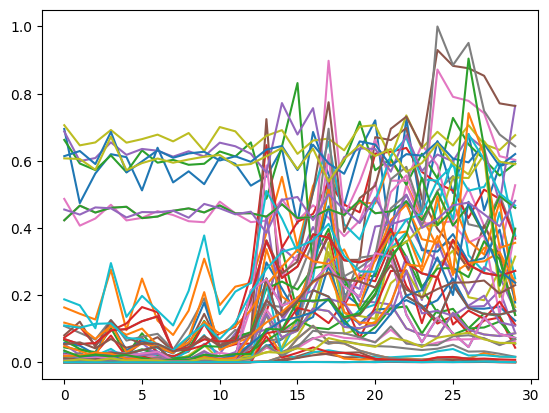

In [325]:
plt.plot(data)

In [326]:
import numpy as np


np.save('data/feature_extract_reshaped.npy', reshaped_array)


In [270]:
#from source.data_import import save_pyarrow

#save_pyarrow(reshaped_array, file_name="feature_extracted")